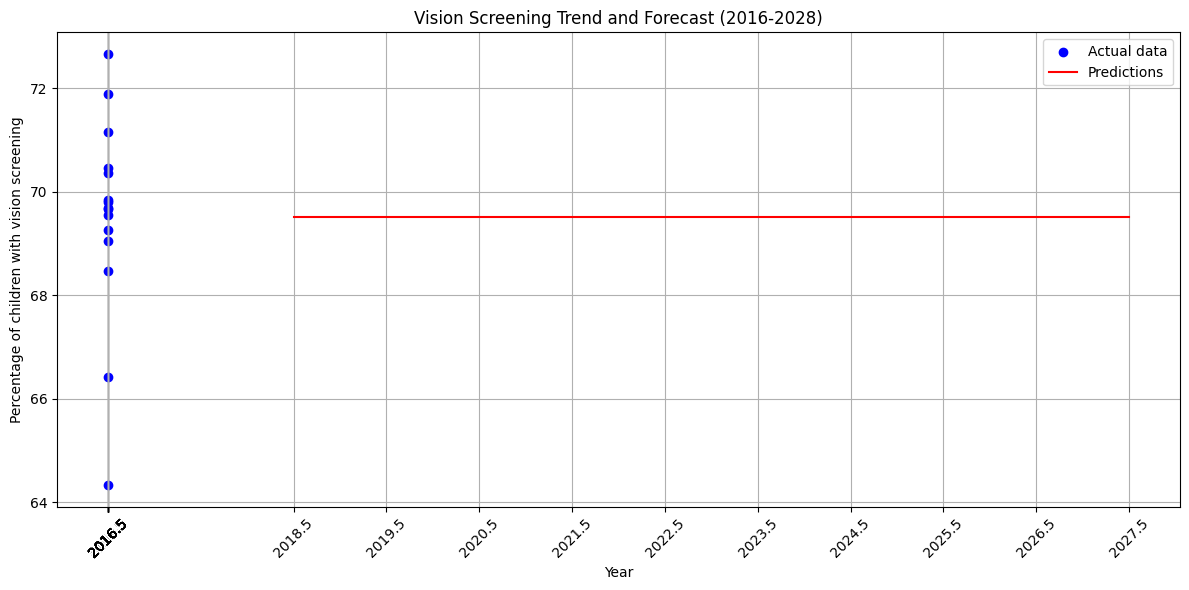

Year 2018.5: 69.50%
Year 2019.5: 69.50%
Year 2020.5: 69.50%
Year 2021.5: 69.50%
Year 2022.5: 69.50%
Year 2023.5: 69.50%
Year 2024.5: 69.50%
Year 2025.5: 69.50%
Year 2026.5: 69.50%
Year 2027.5: 69.50%


In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df = pd.read_csv('updated_NSCH_Vision_Health_Data.csv')

vision_screening = df[(df['Topic'] == 'Service Utilization') &
                      (df['Category'] == 'Screening') &
                      (df['Response'] == 'Yes') &
                      (df['LocationDesc'] == 'National')]

X = vision_screening[['YearStart', 'YearEnd']].values
y = vision_screening['Data_Value'].values

model = LinearRegression()
model.fit(X, y)

# Generate years from 2018 to 2028
future_years = np.array([[year, year+1] for year in range(2018, 2028)])

# Make predictions for future years
predictions = model.predict(future_years)

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(vision_screening[['YearStart', 'YearEnd']].mean(axis=1), y, color='blue', label='Actual data')
plt.plot(future_years.mean(axis=1), predictions, color='red', label='Predictions')
plt.xlabel('Year')
plt.ylabel('Percentage of children with vision screening')
plt.title('Vision Screening Trend and Forecast (2016-2028)')
plt.legend()
plt.xticks(np.concatenate([vision_screening[['YearStart', 'YearEnd']].mean(axis=1), future_years.mean(axis=1)]), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

for years, prediction in zip(future_years, predictions):
    avg_year = (years[0] + years[1]) / 2
    print(f"Year {avg_year:.1f}: {prediction:.2f}%")